In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Multiple Layer GRU

In [17]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.3.0


In [18]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.3.0


In [19]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


In [20]:
tokenizer = info.features['text'].encoder

In [21]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.Conv1D(256, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d_5 (Conv1D)            (None, None, 128)         41088     
_________________________________________________________________
conv1d_6 (Conv1D)            (None, None, 256)         164096    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 745,537
Trainable params: 745,537
Non-trainable params: 0
________________________________________________

In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 113s 288ms/step - loss: 0.4547 - accuracy: 0.7642 - val_loss: 0.3283 - val_accuracy: 0.8687
Epoch 2/10
391/391 [==============================] - 64s 162ms/step - loss: 0.2194 - accuracy: 0.9163 - val_loss: 0.3039 - val_accuracy: 0.8829
Epoch 3/10
391/391 [==============================] - 55s 142ms/step - loss: 0.1548 - accuracy: 0.9430 - val_loss: 0.3867 - val_accuracy: 0.8542
Epoch 4/10
391/391 [==============================] - 53s 135ms/step - loss: 0.1174 - accuracy: 0.9579 - val_loss: 0.3992 - val_accuracy: 0.8698
Epoch 5/10
391/391 [==============================] - 51s 131ms/step - loss: 0.0826 - accuracy: 0.9722 - val_loss: 0.4738 - val_accuracy: 0.8695
Epoch 6/10
391/391 [==============================] - 51s 130ms/step - loss: 0.0576 - accuracy: 0.9800 - val_loss: 0.6406 - val_accuracy: 0.8608
Epoch 7/10
391/391 [==============================] - 51s 130ms/step - loss: 0.0457 - accuracy: 0.9847 - val_loss: 0.6767 - val_a

In [10]:
 import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

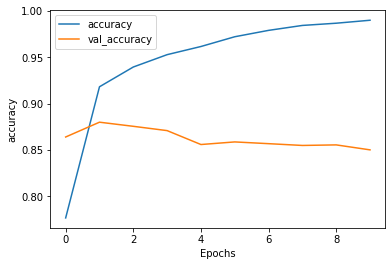

In [11]:
plot_graphs(history, 'accuracy')

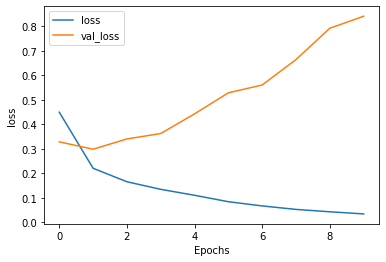

In [12]:
plot_graphs(history, 'loss')